<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here I am working on tweet_sent dataset where sentiment(category) for tweets(text) are pre-defined.I will start from unsupervised(using Textblob and Lexicon based)models & then I will build some Supervised Machine leaning models(classifiers) to comapre the results.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Access Tweet_sent data

In [2]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent.csv


## Read the file

In [3]:
df = pd.read_csv("TweetSent.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 93.3+ KB


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Explore the Data

In [5]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(5968, 2)

pandas.core.frame.DataFrame

11936

(5968, 2)

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


,Tweet,Category
5963,"Ok ed let's do this, Zlatan, greizmann and Lap...",positive
5964,Goal level: Zlatan 90k by Friday? = Posting e...,neutral
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,neutral
5966,Rib injury for Zlatan against Russia is a big ...,neutral
5967,Noooooo! I was hoping to see Zlatan being Zlat...,neutral


In [6]:
df.Category.value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

## Plot the data for visualization

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


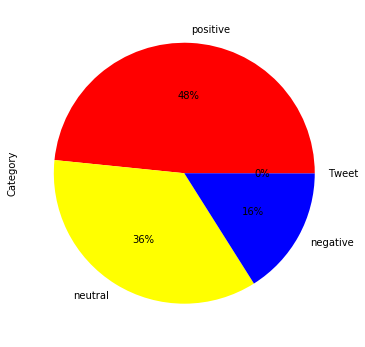

In [8]:
df.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow","blue"])

## From Pie-chart I understand that 48% tweets are positive,36% are neutral while only 16% are negative.

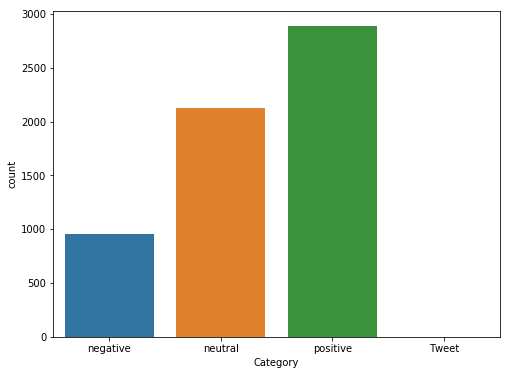

In [9]:
sns.countplot(x = 'Category',data=df)

In [0]:
To get the exact figure I need to 

## With the help of bar chart I can show the exact numbers of different categories of sentiments .


Text(0.5, 1.0, 'Positive Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Negative Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Neutral Tweets')

(-0.5, 399.5, 199.5, -0.5)

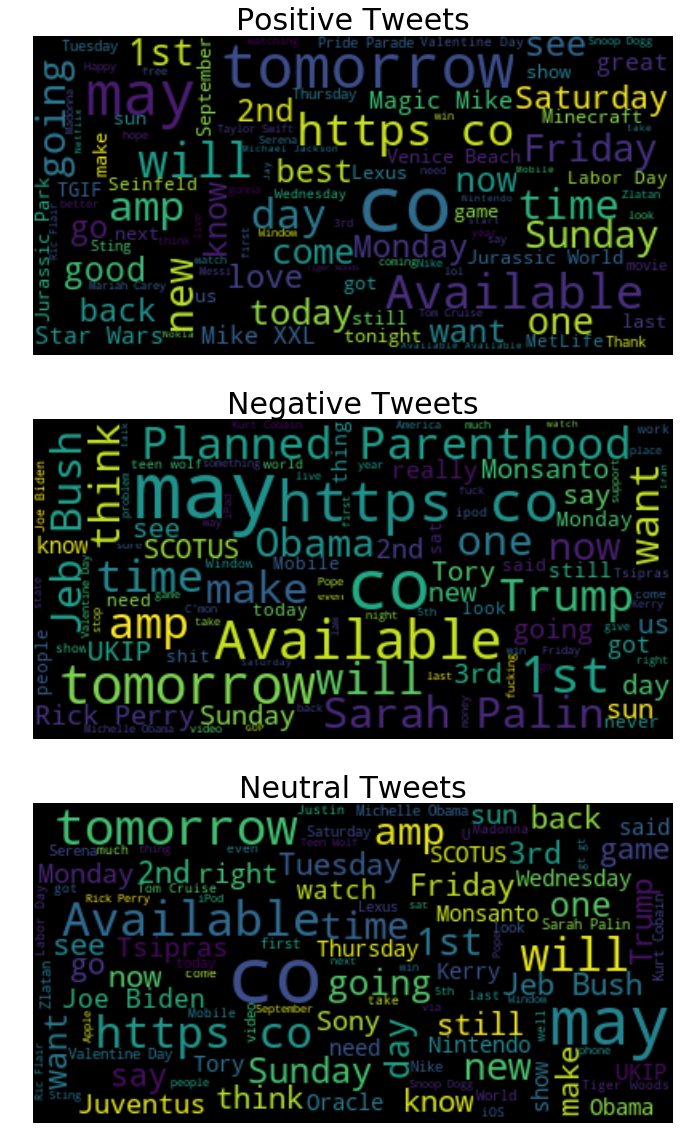

In [10]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_positive=df[df['Category'] == 'positive']
df_negative=df[df['Category']=='negative']
df_neutral=df[df['Category']=='neutral']
tweet_all=" ".join(review for review in df.Tweet)
tweet_positive=" ".join(review for review in df_positive.Tweet)
tweet_negative=" ".join(review for review in df_negative.Tweet)
tweet_neutral=" ".join(review for review in df_neutral.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (20,20))
# Create and generate a word cloud image:
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_negative)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_neutral)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')


## Here I have generated the word cloud for different class of sentiments.

## Data preprocessing

In [0]:
tweets_text = []
f_in = open("TweetSent.csv",'r')
for line in f_in.readlines():
    tweets_text.append(line)
f_in.close()

In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(0,1000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',tweets_text[i])
  # Convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # Split sentences in to words
  tweets_text_cln = tweets_text_cln.split()
  # Remove english stopwords
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  tweets_text_cln = [wn.lemmatize(x) for x in tweets_text_cln]
  # Join words to form the original sentence, but cleaned-up
  tweets_text_cln = " ".join(tweets_text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(tweets_text_cln)
  
  

In [13]:
#Clean Corpus
corpus[0:5]

['tweet category',
 'available negative',
 'io app transport security mm need check rd party network pod support',
 'mar io device download app',
 'vanagon phone run latest io may account problem day time replaced negative']

In [14]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (df):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

[['tweet'], ['category']]

## Create a Bag of Words (BOW) from Corpus

In [0]:
bagofwords = []
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [16]:
bagofwords[2]

['io',
 'app',
 'transport',
 'security',
 'mm',
 'need',
 'check',
 'rd',
 'party',
 'network',
 'pod',
 'support']

## Identify the most frequently used words

In [17]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['tweet', 'category', 'available', 'negative', 'io', 'app', 'transport', 'security', 'mm', 'need']

Most commonly occuring words and frequency



[('positive', 376),
 ('neutral', 244),
 ('jurassic', 192),
 ('may', 170),
 ('tomorrow', 167),
 ('th', 129),
 ('negative', 126),
 ('iphone', 114),
 ('biden', 112),
 ('world', 110),
 ('bush', 109),
 ('joe', 105),
 ('jeb', 104),
 ('available', 102),
 ('io', 100),
 ('ipod', 98),
 ('park', 98),
 ('ipad', 97),
 ('z', 92),
 ('jay', 92)]

In [0]:
words_to_remove = ['z','io','th','jeb','positive','neutral','negative','st','see','get','amp','rd','mm','check']
bagofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [19]:
bagofwords_new[0:5]

[['tweet', 'category'],
 ['available'],
 ['app',
  'transport',
  'security',
  'need',
  'party',
  'network',
  'pod',
  'support'],
 ['mar', 'device', 'download', 'app'],
 ['vanagon',
  'phone',
  'run',
  'latest',
  'may',
  'account',
  'problem',
  'day',
  'time',
  'replaced']]

In [20]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,positive,376
1,neutral,244
2,jurassic,192
3,may,170
4,tomorrow,167


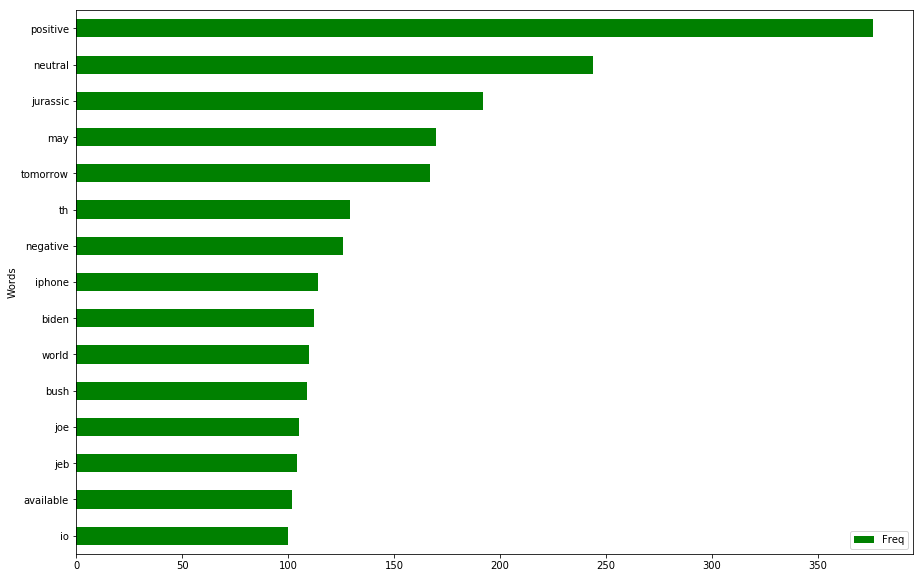

In [21]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "green")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='black',
                      max_words=20
                         ).generate(word_string)

<Figure size 1080x1440 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

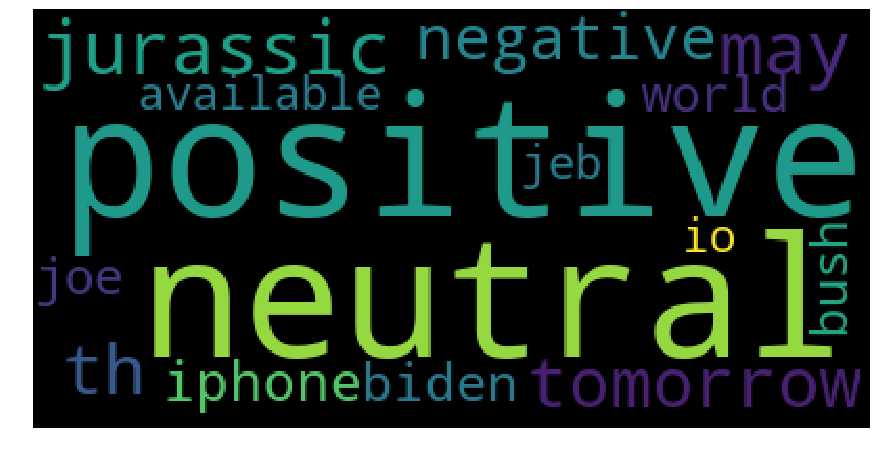

In [23]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Unsupervised Sentiment Analysis using Textblob

## Import Text Blob and identify the polarity of the tweets

In [24]:
sentiment_text = [TextBlob(tweet) for tweet in corpus]
print(sentiment_text[5].polarity)
print(sentiment_text[5])

0.3181818181818182
sure start publication io live helping ask anything session today friday


In [25]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

,Polarity,Tweet_Text
464,1.000000,know recited jay z may beat best reply
399,1.000000,become st footballer sport owned legendary rap...
663,1.000000,biden presidential bid depends best family was...
634,0.800000,welcome veep joe biden kicking two day visit s...
615,0.800000,happy friday joe biden making cameo episode wo...
985,0.800000,justin funeral tomorrow pleasure known worked ...
841,0.750000,jurassic world excellent way could better kare...
991,0.742424,best jersey season order choose best juventus ...
732,0.709091,ended st fringe experience jurassic park thank...
589,0.700000,let honest joe biden would win may even ask wa...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff031990630>],
      dtype=object)

<function matplotlib.pyplot.title>

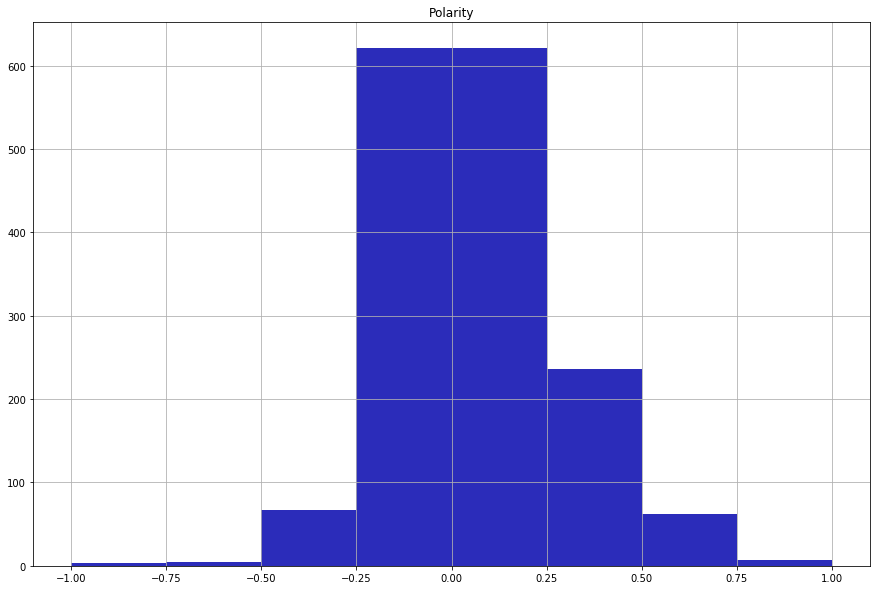

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title

# Lexicon Based Unsupervised Sentiment Analysis

In [27]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

[['tweet', 'category'],
 ['available', 'negative'],
 ['io',
  'app',
  'transport',
  'security',
  'mm',
  'need',
  'check',
  'rd',
  'party',
  'network',
  'pod',
  'support'],
 ['mar', 'io', 'device', 'download', 'app'],
 ['vanagon',
  'phone',
  'run',
  'latest',
  'io',
  'may',
  'account',
  'problem',
  'day',
  'time',
  'replaced',
  'negative'],
 ['sure',
  'start',
  'publication',
  'io',
  'live',
  'helping',
  'ask',
  'anything',
  'session',
  'today',
  'friday'],
 ['two',
  'dollar',
  'tuesday',
  'forklift',
  'quickkey',
  'io',
  'suite',
  'page',
  'today'],
 ['already', 'signed', 'test', 'io', 'game', 'now', 'chance'],
 ['youtube',
  'gaming',
  'officially',
  'launch',
  'web',
  'android',
  'io',
  'august',
  'youtube',
  'finally',
  'going',
  'r',
  'webseries',
  'neutral'],
 ['youtube',
  'gaming',
  'launch',
  'tomorrow',
  'io',
  'android',
  'apps',
  'go',
  'head',
  'head',
  'twitch',
  'io',
  'game',
  'neutral'],
 ['yashan',
  'bbc',

In [29]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111.csv


In [0]:
lex_file = open("AFINN-111.csv")

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [34]:
print(lexicons)

{'t': 2, 'self-deluded': -2, 'selfish': -3, 'selfishness': -3, 'sentence': -2, 'sentenced': -2, 'sentences': -2, 'sentencing': -2, 'serene': 2, 'severe': -2, 'sexy': 3, 'shaky': -2, 'shame': -2, 'shamed': -2, 'shameful': -2, 'share': 1, 'shared': 1, 'shares': 1, 'shattered': -2, 'shit': -4, 'shithead': -4, 'shitty': -3, 'shock': -2, 'shocked': -2, 'shocking': -2, 'shocks': -2, 'shoot': -1, 'short-sighted': -2, 'short-sightedness': -2, 'shortage': -2, 'shortages': -2, 'shrew': -4, 'shy': -1, 'sick': -2, 'sigh': -2, 'significance': 1, 'significant': 1, 'silencing': -1, 'silly': -1, 'sincere': 2, 'sincerely': 2, 'sincerest': 2, 'sincerity': 2, 'sinful': -3, 'singleminded': -2, 'skeptic': -2, 'skeptical': -2, 'skepticism': -2, 'skeptics': -2, 'slam': -2, 'slash': -2, 'slashed': -2, 'slashes': -2, 'slashing': -2, 'slavery': -3, 'sleeplessness': -2, 'slick': 2, 'slicker': 2, 'slickest': 2, 'sluggish': -2, 'slut': -5, 'smart': 1, 'smarter': 2, 'smartest': 2, 'smear': -2, 'smile': 2, 'smiled':

In [0]:
#For each tweet
#For each word in tweet
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
#print(strength)

In [0]:
import pandas as pd
senti_matrix = pd.DataFrame(strength, sentiment_df.Tweet_Text)

In [38]:
senti_matrix[0:5]

,0
Tweet_Text,
tweet category,0
available negative,0
io app transport security mm need check rd party network pod support,2
mar io device download app,0
vanagon phone run latest io may account problem day time replaced negative,0


# Now Splitting the data  in features and labels for supervised ML

In [70]:
#Create labels
labels = df['Category']
labels.head()

0    negative
1     neutral
2     neutral
3    negative
4    positive
Name: Category, dtype: object

In [71]:
#Create features
tweets = df['Tweet']
tweets.head()

0                                        Not Available
1    IOS 9 App Transport Security. Mm need to check...
2    Mar if you have an iOS device, you should down...
3    @jimmie_vanagon my phone does not run on lates...
4    Not sure how to start your publication on iOS?...
Name: Tweet, dtype: object

In [0]:
processed_features = []

for sentence in range(0, len(tweets)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(tweets[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [42]:
#Transform the data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [74]:
# Splitting up training and test sets by choosing random samples from classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features,df.Category, test_size=0.33, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3998, 1391)
(1970, 1391)
(3998,)
(1970,)


# NaiveBayes Classifier

In [76]:
processed_features


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25734516],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.34939736],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51159923]])

In [0]:
from textblob.classifiers import NaiveBayesClassifier

In [78]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
#Fit the model for naive bayes classifier
nb_clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#make class prediction for X-test
y_pred_class=nb_clf.predict(X_test)

In [81]:
#Calculate accuracy of class prediction
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.5802030456852791

In [82]:
#Print the confusion matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[ 39, 149, 126],
       [ 23, 276, 415],
       [ 10, 104, 828]])

# K-Means Clustering

In [0]:
#Text clustering with K-means
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [84]:
#Transform the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(x)
print(X)

  (0, 1475)	1.0
  (1, 5071)	0.34807397660920864
  (1, 6309)	0.09541377358356314
  (1, 12724)	0.3212701248608677
  (1, 10058)	0.34807397660920864
  (1, 9020)	0.2858373601835403
  (1, 9715)	0.2008711603915214
  (1, 331)	0.16737669493937818
  (1, 2685)	0.22599345225419526
  (1, 8990)	0.19603112868947306
  (1, 8630)	0.33239472846154006
  (1, 11649)	0.29446627311252693
  (1, 13446)	0.33239472846154006
  (1, 1212)	0.24208628492176246
  (1, 6746)	0.1987803926238411
  (2, 5544)	0.5128820018136275
  (2, 4073)	0.415746527922418
  (2, 3793)	0.39807409521658105
  (2, 8181)	0.415746527922418
  (2, 6309)	0.1405908240335696
  (2, 1212)	0.3567106614284387
  (2, 6746)	0.29290005154472454
  (3, 10959)	0.40089447844809667
  (3, 13234)	0.18266950245311755
  (3, 3565)	0.16628071439967554
  :	:
  (5966, 13301)	0.3009877388839646
  (5966, 12690)	0.3009877388839646
  (5966, 1450)	0.3009877388839646
  (5966, 8589)	0.27780981903570234
  (5966, 14846)	0.1740716283105759
  (5966, 1987)	0.27780981903570234
  (5966

In [85]:
#Build the clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:


(None,)

 http


(None,)

 https


(None,)

 just


(None,)

 day


(None,)

 1st


(None,)

 time


(None,)

 friday


(None,)

 sunday


(None,)

 like


(None,)

 amp


(None,)

<function print>

Cluster 1:


(None,)

 available


(None,)

 zyofhzerio


(None,)

 finger


(None,)

 fiona


(None,)

 finnish


(None,)

 finna


(None,)

 finland


(None,)

 finishing


(None,)

 finishes


(None,)

 finished


(None,)

<function print>

Cluster 2:


(None,)

 tomorrow


(None,)

 going


(None,)

 day


(None,)

 just


(None,)

 ll


(None,)

 watch


(None,)

 new


(None,)

 night


(None,)

 http


(None,)

 swift


(None,)

<function print>

In [87]:
#Use model for prediction
print("\n")
print("Prediction")
 
Y = vectorizer.transform(["Mar if you have an iOS device, you should download our app too: http://t.co/gl3tn2uDnD"])
prediction = model.predict(Y)
print(prediction)



Prediction
[0]


In [88]:
Y = vectorizer.transform(["Who's ready for 0.12.1 Build 12 Tomorrow, Might be the last build till it come to iOS !"])
prediction = model.predict(Y)
print(prediction)

[2]


In [89]:
Y = vectorizer.transform(["@jimmie_vanagon my phone does not run on latest IOS which may account for problem the other day .. time it was replaced"])
prediction = model.predict(Y)
print(prediction)

[0]
